#### Modelagem e normalização de bancos de dados relacionais

Certo dia, um dos gestores do banco em que você trabalha como cientista de dados procurou você pedindo ajuda para projetar um pequeno banco de dados com o objetivo de mapear os clientes da companhia pelos diferentes produtos financeiros que eles contrataram.

O gestor explicou que o banco tinha uma grande quantidade de clientes e oferecia uma variedade de produtos financeiros, como cartões de crédito, empréstimos, seguros e investimentos. No entanto, eles estavam tendo dificuldades para entender quais produtos eram mais populares entre os clientes e como esses produtos estavam interagindo entre si.

Como ponto de partida, o gestor deixou claro que um cliente pode contratar vários produtos diferentes ao passo que um mesmo produto pode também estar associado a vários clientes diferentes e elaborou um rústico esboço de banco de dados com duas tabelas, da seguinte forma:

Tabela 1
	Nome da tabela: cliente Colunas: codigo_cliente, nome_cliente, sobrenome_cliente, 	telefone_cliente, municipio_cliente, codigo_tipo_cliente, tipo_cliente

Tabela 2
	Nome da tabela: produto Colunas: codigo_produto, nome_produto, descricao_produto, 	codigo_tipo_produto, tipo_produto, codigo_diretor_responsavel, nome_diretor_responsavel, 	email_diretor_responsavel

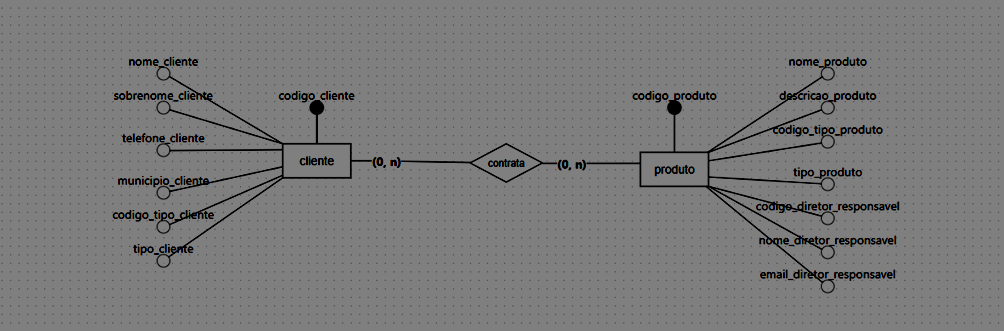

2) Agora apresente um modelo lógico que expresse as mesmas informações e relacionamentos descritos no modelo original, mas decompondo-os quando necessário para que sejam respeitadas as 3 primeiras formas normais. Destaque atributos chaves e apresente também a cardinalidade dos relacionamentos.

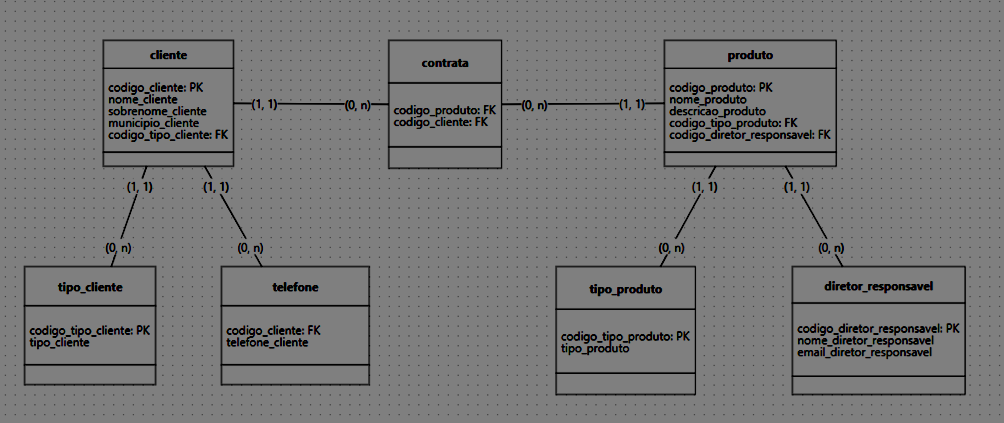

#### Consultas SQL simples e complexas em um banco de dados relacional

Um exemplo de modelo de banco de dados com relacionamento muitos-para-muitos pode ser o de um e-commerce que tem produtos e categorias, onde um produto pode pertencer a várias categorias e uma categoria pode estar associada a vários produtos. Nesse caso, teríamos duas tabelas: "produtos" e "categorias", com uma tabela intermediária "produtos_categorias" para relacionar os produtos às suas categorias.

CREATE TABLE produtos (
	id INT PRIMARY KEY AUTO_INCREMENT,
	nome VARCHAR(100) NOT NULL,
	preco DECIMAL(10, 2) NOT NULL );

CREATE TABLE categorias (
	id INT PRIMARY KEY AUTO_INCREMENT,
	nome VARCHAR(100) NOT NULL );

CREATE TABLE produtos_categorias (
	produto_id INTEGER REFERENCES produtos(id),
	categoria_id INTEGER REFERENCES categorias(id) );


Assim, usando o subconjunto da "structured query language" chamado de DQL, produza consultas de modo a atender cada uma das seguintes solicitações:

3) Liste os nomes de todos os produtos que custam mais de 100 reais, ordenando-os primeiramente pelo preço e em segundo lugar pelo nome. Use alias para mostrar o nome da coluna nome como "Produto" e da coluna preco como "Valor". A resposta da consulta não deve mostrar outras colunas de dados.

In [ ]:
SELECT nome AS Produto,
       preco AS Valor
        FROM produtos
            WHERE preco > 100
                ORDER BY preco ASC, nome ASC;

4) Liste todos os ids e preços de produtos cujo preço seja maior do que a média de todos os preços encontrados na tabela "produtos".

In [ ]:
SELECT id,
       preco
        FROM produtos
            WHERE preco > (SELECT AVG(preco) FROM produtos)

5) Para cada categoria, mostre o preço médio do conjunto de produtos a ela associados. Caso uma categoria não tenha nenhum produto a ela associada, esta categoria não deve aparecer no resultado final. A consulta deve estar ordenada pelos nomes das categorias.

In [ ]:
SELECT C.id AS id_categoria, 
       C.nome AS categoria, 
       AVG(A.preco) as preco_medio
        FROM produtos A
            INNER JOIN categorias C ON A.id = C.produto_id
            INNER JOIN produtos categorias B ON A.id = B.categoria_id
                GROUP BY C.id, C.nome
                ORDER BY C.nome